In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Combined Customers Data - Sheet1.csv to Combined Customers Data - Sheet1.csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Combined Customers Data - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Check for null values in the data
if data.isnull().values.any():
    # Handle null values (e.g., fill with 0 or any other appropriate method)
    data = data.fillna(0)

# Separate the labels (fraudulent or normal) from the input features
labels = data['FLAG']
input_features = data.drop(columns=['CUSTOMER', 'FLAG'])

# Stratified splitting of the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features, labels, test_size=0.3, stratify=labels, random_state=42)

# Convert the data to numpy arrays for vanilla RNN
X_train_rnn = X_train.values
X_test_rnn = X_test.values

# Define the time_steps
time_steps = 12

# Function to create sequences of data with specified time_steps
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps + 1):
        sequences.append(data[i:i + time_steps])
    return np.array(sequences)

# Reshape the input data into 3D sequences for SimpleRNN
X_train_rnn = create_sequences(X_train_rnn, time_steps)
X_test_rnn = create_sequences(X_test_rnn, time_steps)

# Reshape y_train and y_test to match the corresponding X data
y_train = y_train[time_steps - 1:].to_numpy()
y_test = y_test[time_steps - 1:].to_numpy()

# Define the vanilla RNN model
def create_rnn_model():
    model = models.Sequential()

    model.add(layers.SimpleRNN(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification (theft or normal)

    return model

# Create the RNN model
rnn_model = create_rnn_model()

# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
rnn_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 128)               18048     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 26,369
Trainable params: 26,369
Non-trainable params: 0
_________________________________________________________________


Test Accuracy before training: 0.9278350472450256
Epoch 1/15
8/8 [==============================] - 0s 19ms/step - loss: 0.0393 - accuracy: 0.9917
Epoch 2/15
8/8 [==============================] - 0s 20ms/step - loss: 0.0417 - accuracy: 0.9917
Epoch 3/15
8/8 [==============================] - 0s 18ms/step - loss: 0.0340 - accuracy: 0.9917
Epoch 4/15
8/8 [==============================] - 0s 23ms/step - loss: 0.0354 - accuracy: 0.9917
Epoch 5/15
8/8 [==============================] - 0s 20ms/step - loss: 0.0351 - accuracy: 0.9917
Epoch 6/15
8/8 [==============================] - 0s 18ms/step - loss: 0.0336 - accuracy: 0.9917
Epoch 7/15
8/8 [==============================] - 0s 10ms/step - loss: 0.0347 - accuracy: 0.9917
Epoch 8/15
8/8 [==============================] - 0s 10ms/step - loss: 0.0362 - accuracy: 0.9917
Epoch 9/15
8/8 [==============================] - 0s 11ms/step - loss: 0.0324 - accuracy: 0.9917
Epoch 10/15
8/8 [==============================] - 0s 12ms/step - loss: 0.039

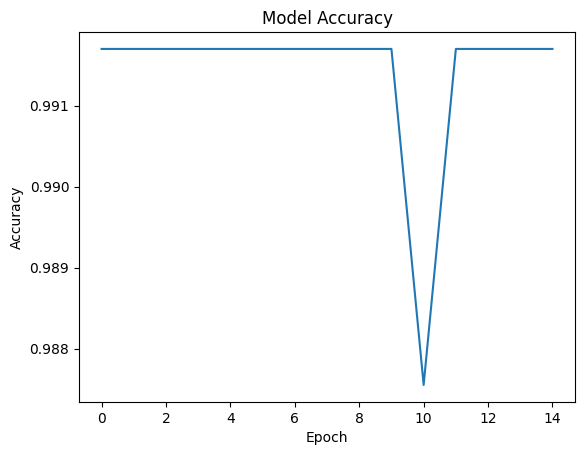

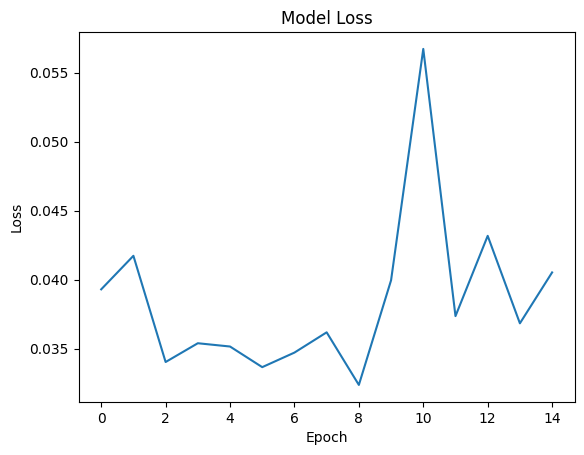

In [ ]:
# Evaluate the model on the test data before training
test_loss_before, test_accuracy_before = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print("Test Accuracy before training:", test_accuracy_before)

# Train the model using the training data
history = rnn_model.fit(X_train_rnn, y_train, epochs=15, batch_size=32)

# Evaluate the model on the test data after training
test_loss, test_accuracy = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print("Test Accuracy after training:", test_accuracy)

# Plot the accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
